# Save annual data

Save annual-mean data.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
from multiprocessing import Pool

import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman

<ipython-input-2-8dae68aaf5b4>:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [4]:
STITCHED_DIR = "./country-crunch-stitched"
STITCHED_NORMALISED_DIR = "./country-crunch-stitched-normalised"

# STITCHED_DIR = "./country-crunch-stitched-popn-weighted"
# STITCHED_NORMALISED_DIR = "./country-crunch-stitched-normalised-popn-weighted"

MAX_WORKERS = 60

<IPython.core.display.Javascript object>

In [5]:
load_dir = STITCHED_DIR
# load_dir = STITCHED_NORMALISED_DIR

<IPython.core.display.Javascript object>

In [6]:
crunched_files = [
    f
    for f in glob.glob(os.path.join(load_dir, "**", "*.nc"), recursive=True)
    if "ssp" in f
]
crunched_files[:2]
crunched_files

['./country-crunch-stitched/netcdf-scm_tas_Amon_CanESM5_ssp245_r1i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_CESM2-WACCM_ssp585_r4i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_CESM2-WACCM_ssp126_r1i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_NESM3_ssp245_r1i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_IPSL-CM6A-LR_ssp460_r2i1p1f1_gr_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_CanESM5_ssp119_r10i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_EC-Earth3-Veg_ssp119_r1i1p1f1_gr_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_CanESM5_ssp370_r1i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_CanESM5_ssp245_r3i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched/netcdf-scm_tas_Amon_CanESM5_ssp534-over_r1i1p1f1_gn_185001-230012.nc',
 './country-crunch-stitched/netcdf-sc

<IPython.core.display.Javascript object>

In [7]:
# [f for f in crunched_files if "CM4" in f]

<IPython.core.display.Javascript object>

In [8]:
dud_files = [
    "{}/netcdf-scm_tas_Amon_MRI-ESM2-0_ssp370-lowNTCF_r1i1p1f1_gn_185001-205512.nc".format(
        load_dir
    )
]
crunched_files = [f for f in crunched_files if f not in dud_files]

<IPython.core.display.Javascript object>

In [9]:
def load_file(f):
    return scmdata.ScmRun.from_nc(f)


all_dat = []
with Pool(MAX_WORKERS) as pool:
    all_dat = pool.map(load_file, crunched_files)

all_dat = scmdata.run_append(
    [scmdata.ScmRun(s.timeseries(time_axis="year-month")) for s in tqdman.tqdm(all_dat)]
)

/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_varia

  0%|          | 0/447 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [10]:
cms = all_dat.get_unique_meta("climate_model")
display(len(cms))
sorted(cms)

47

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CAS-ESM2-0',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'CanESM5-CanOE',
 'E3SM-1-1',
 'EC-Earth3',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'KIOST-ESM',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL']

<IPython.core.display.Javascript object>

In [11]:
all_dat_annual_mean = all_dat.time_mean("AC")
all_dat_annual_mean

<scmdata.ScmRun (timeseries: 67147, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	       activity_id climate_model grid member_id mip_era        model  \
	0      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	1      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	2      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	3      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	4      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	...            ...           ...  ...       ...     ...          ...   
	67142  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67143  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67144  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67145  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67146  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	
	 

<IPython.core.display.Javascript object>

In [12]:
out_file_name = "regional_means.hdf5"
all_dat_annual_mean.timeseries(time_axis="year").to_hdf(out_file_name, key="df")
!du -sh {out_file_name}

233M	regional_means.hdf5


<IPython.core.display.Javascript object>

In [13]:
del all_dat_annual_mean

<IPython.core.display.Javascript object>

## How to work with the data

In [14]:
all_dat_annual_mean_loaded = scmdata.ScmRun(pd.read_hdf(out_file_name, key="df"))
all_dat_annual_mean_loaded

<scmdata.ScmRun (timeseries: 67147, timepoints: 451)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       activity_id climate_model grid member_id mip_era        model  \
	0      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	1      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	2      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	3      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	4      ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	...            ...           ...  ...       ...     ...          ...   
	67142  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67143  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67144  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67145  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	67146  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	
	 

<IPython.core.display.Javascript object>

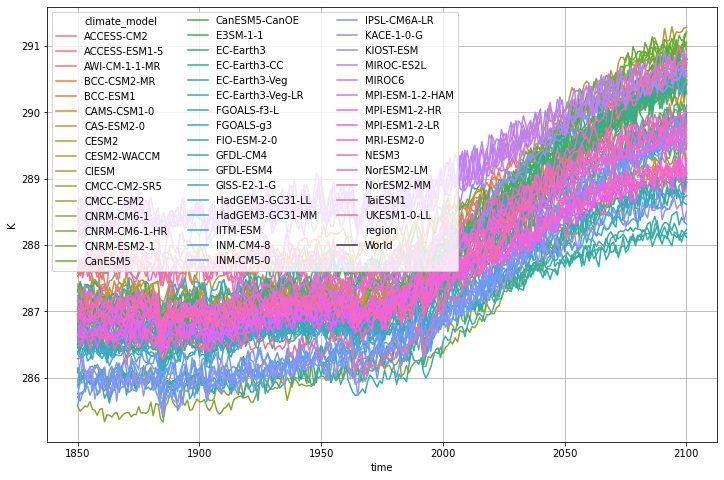

<IPython.core.display.Javascript object>

In [15]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World")
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .filter(scenario="ssp245")
    #     .filter(climate_model="TaiESM1")
    .lineplot(
        style="region",
        hue="climate_model",
        hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()

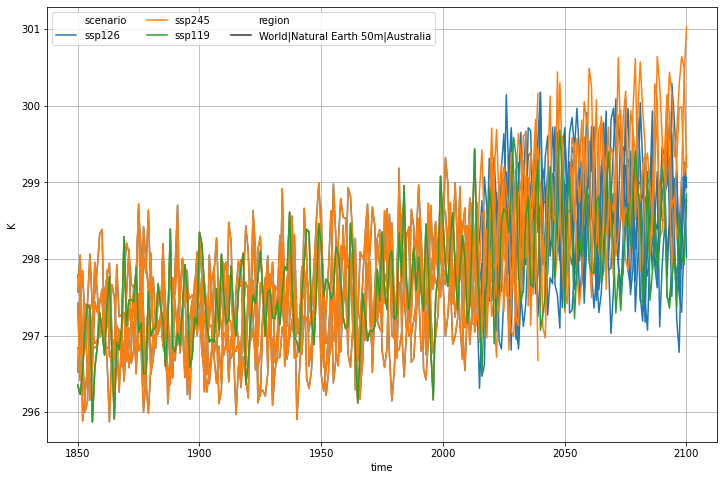

<IPython.core.display.Javascript object>

In [16]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World*Australia*")
    .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .filter(climate_model="MIROC6")
    .lineplot(
        hue="scenario",
        style="region",
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

In [17]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat_annual_mean_loaded.filter(year=mean_years)
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean
0,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World,ssp245,K,tas,air_temperature,290.880890
1,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Afghanistan,ssp245,K,tas,air_temperature,287.730572
2,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Algeria,ssp245,K,tas,air_temperature,298.799341
3,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Angola,ssp245,K,tas,air_temperature,300.155954
4,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Antarctica,ssp245,K,tas,air_temperature,240.483813
...,...,...,...,...,...,...,...,...,...,...,...,...
67142,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Vietnam,ssp126,K,tas,air_temperature,298.635554
67143,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|W. Sahara,ssp126,K,tas,air_temperature,301.477363
67144,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Yemen,ssp126,K,tas,air_temperature,301.222091
67145,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Zambia,ssp126,K,tas,air_temperature,296.417347


<IPython.core.display.Javascript object>

In [18]:
tmp = bardf[bardf["region"] == "World"][["scenario", "climate_model"]].drop_duplicates()
display(tmp["scenario"].value_counts())
tmp

ssp585            45
ssp245            44
ssp126            42
ssp370            38
ssp119            14
ssp434             8
ssp534-over        7
ssp460             7
ssp370-lowNTCF     7
Name: scenario, dtype: int64

,scenario,climate_model
0,ssp245,CanESM5
134,ssp585,CESM2-WACCM
292,ssp126,CESM2-WACCM
450,ssp245,NESM3
597,ssp460,IPSL-CM6A-LR
...,...,...
63516,ssp119,GFDL-ESM4
64417,ssp126,CMCC-CM2-SR5
65813,ssp126,GISS-E2-1-G
66114,ssp245,UKESM1-0-LL


<IPython.core.display.Javascript object>

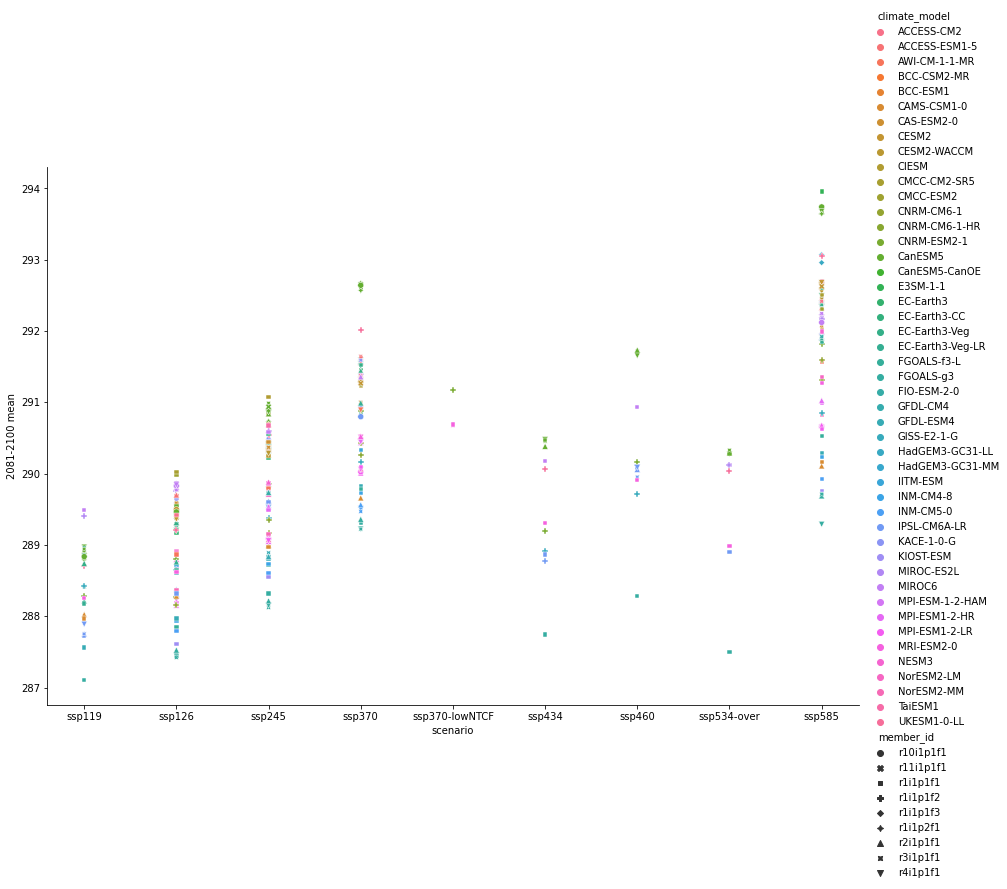

<IPython.core.display.Javascript object>

In [19]:
sns.relplot(
    data=bardf[bardf["region"] == "World"].sort_values(by="scenario"),
    #     x="climate_model",
    #     y="value",
    #     hue="scenario",
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    style="member_id",
    style_order=sorted(bardf["member_id"].unique().tolist()),
    #     estimator="median",
    height=8,
    aspect=1.5,
    #     kind="line",
    #     marker="x",
)

In [20]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat.filter(year=mean_years)
    .time_mean("AC")
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf["Population weighted"] = bardf["region"].str.contains("Popn weighted")
bardf["region"] = bardf["region"].str.replace("Popn weighted ", "")
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean,Population weighted
0,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World,ssp245,K,tas,air_temperature,290.880890,False
1,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Afghanistan,ssp245,K,tas,air_temperature,287.730572,False
2,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Algeria,ssp245,K,tas,air_temperature,298.799341,False
3,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Angola,ssp245,K,tas,air_temperature,300.155954,False
4,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Antarctica,ssp245,K,tas,air_temperature,240.483813,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67142,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Vietnam,ssp126,K,tas,air_temperature,298.635554,False
67143,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|W. Sahara,ssp126,K,tas,air_temperature,301.477363,False
67144,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Yemen,ssp126,K,tas,air_temperature,301.222091,False
67145,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Zambia,ssp126,K,tas,air_temperature,296.417347,False


<IPython.core.display.Javascript object>

<ipython-input-21-6497382ecafc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)


done


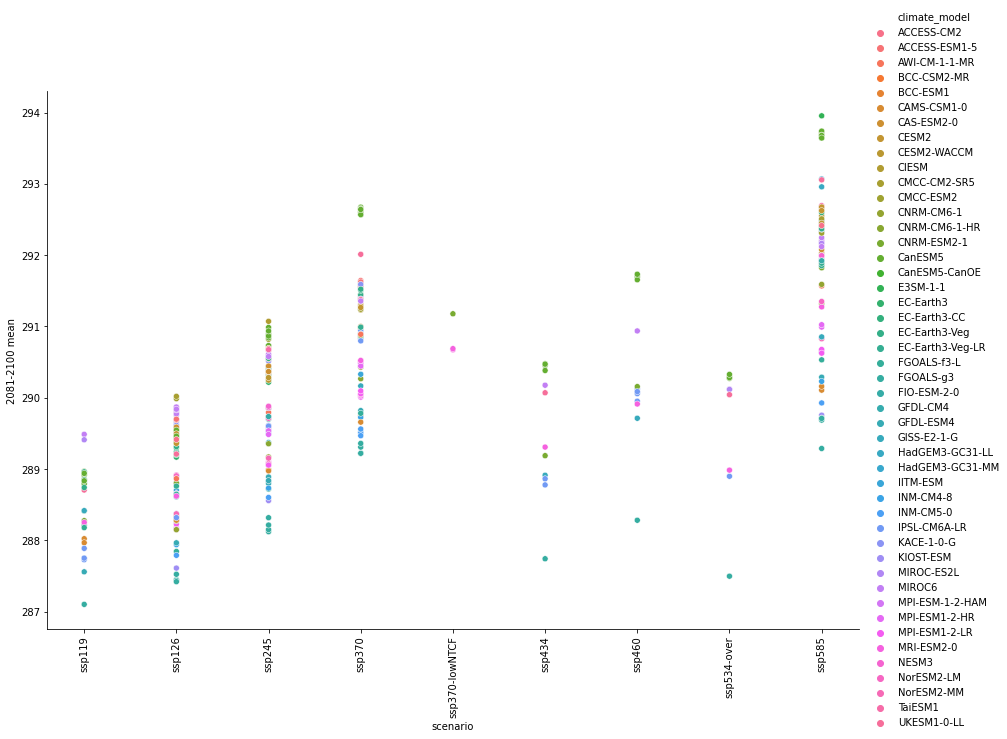

<IPython.core.display.Javascript object>

In [21]:
fg = sns.relplot(
    data=bardf[bardf["region"] == "World"].sort_values(by="scenario"),
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    height=8,
    aspect=1.5,
)
fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)
print("done")